<a href="https://colab.research.google.com/github/Fabriciogg8/AI_ML_Python/blob/main/car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📘 Project: Improve a Car Company´s Pricing Strategy

###🔍 Introduction

In this project, I’ll take the role of a data analyst helping Akashi, a Japanese car company, to understand why their previous attempt to launch cars in the U.S. market failed.
Their main issue was incorrect pricing — they relied on intuition instead of data-driven models.

To fix this, I’ll build machine learning models using Python to predict car prices based on vehicle characteristics.
Through this project, I’ll apply linear regression, evaluate residuals, and finally test non-parametric models such as Decision Trees, KNN, and SVR.
This analysis will help Akashi design a better pricing strategy for their re-entry into the U.S. market.

####🪜 Step 1 of 7: Akashi’s Failure to Launch
💬 Introduction

Now I will begin by understanding the business problem.
Akashi previously tried to enter the U.S. car market but failed because their cars were overpriced. Prices were determined using intuition from the Japanese market, which doesn’t reflect U.S. market conditions.
My goal is to use regression models to predict optimal prices based on U.S. market data.

###🪜 Step 2 of 7: Reading and Understanding the Data
📊 Data Import

Now I will import the dataset containing details of cars currently for sale in the U.S. market.
This dataset includes various features like engine location, horsepower, and fuel efficiency, along with the price.

### 🧮 Reading the dataset

In [ ]:
# Run this cell to automatically download the dataset into my working folder
from urllib.request import urlretrieve

url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/120/us_car_prices.csv"

### 📥 Loading the data into a Pandas DataFrame

In [ ]:
import pandas as pd

# I’ll load the dataset and set the first column as the index
us_car_prices = pd.read_csv(url, index_col=0)
us_car_prices.head()


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,fuelsystem,enginetype,cylindernumber,...,enginesize,symboling,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,mpfi,dohc,four,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,mpfi,dohc,four,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,mpfi,ohcv,six,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
4,audi 100 ls,gas,std,four,sedan,fwd,front,mpfi,ohc,four,...,109,2,3.19,3.40,10.0,102,5500,24,30,13950.0
5,audi 100ls,gas,std,four,sedan,4wd,front,mpfi,ohc,five,...,136,2,3.19,3.40,8.0,115,5500,18,22,17450.0


### 🔧 Splitting predictors and response

In [ ]:
# I’ll separate the response variable (price) from the predictors
response = us_car_prices[["price"]]
predictors = us_car_prices.drop(["price"], axis=1)
predictors.head()


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,fuelsystem,enginetype,cylindernumber,...,carheight,enginesize,symboling,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,mpfi,dohc,four,...,48.8,130,3,3.47,2.68,9.0,111,5000,21,27
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,mpfi,dohc,four,...,48.8,130,3,3.47,2.68,9.0,111,5000,21,27
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,mpfi,ohcv,six,...,52.4,152,1,2.68,3.47,9.0,154,5000,19,26
4,audi 100 ls,gas,std,four,sedan,fwd,front,mpfi,ohc,four,...,54.3,109,2,3.19,3.40,10.0,102,5500,24,30
5,audi 100ls,gas,std,four,sedan,4wd,front,mpfi,ohc,five,...,54.3,136,2,3.19,3.40,8.0,115,5500,18,22


###🪜 Step 3 of 7: Picking the Predictor Features
🧩 Feature Selection

Now I will identify which variables are most relevant to predicting price.
I’ll start by exploring correlations among the numeric columns and remove those that are redundant or weakly correlated.



### 🔍 Correlation analysis

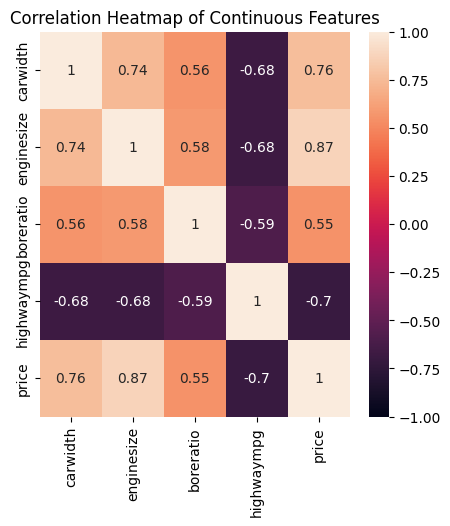

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting continuous columns for correlation analysis
continuous_columns = us_car_prices.iloc[:,10:]
continuous_columns = continuous_columns.drop(
    ["symboling","stroke","compressionratio","peakrpm","horsepower","carlength","carheight","citympg"],
    axis=1
)

# Visualizing correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(continuous_columns.corr(), vmin=-1, vmax=1.0, annot=True)
plt.title("Correlation Heatmap of Continuous Features")
plt.show()


### 🧹 Dropping redundant or weakly correlated features

In [ ]:
predictors = predictors.drop(
    ["symboling","stroke","compressionratio","peakrpm","horsepower","carlength","carwidth","carheight","citympg"],
    axis=1
)


### 🔡 Encoding categorical variables

In [ ]:
# I’ll convert categorical columns into dummy variables
predictors = pd.get_dummies(predictors, drop_first=True)
predictors.head()


,enginesize,boreratio,highwaympg,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
car_ID,,,,,,,,,,,,,,,,,,,,,
1,130,3.47,27,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,130,3.47,27,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,152,2.68,26,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,109,3.19,30,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
5,136,3.19,22,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False


###🪜 Step 4 of 7: Building and Evaluating the Model
⚙️ Model Training

Now I will build a Linear Regression model using the cleaned predictors.
After fitting the model, I’ll calculate both the R² and Adjusted R² values to evaluate model performance.

### 🧮 Building the Linear Regression model

In [ ]:
import sklearn.linear_model as skl

linear_regression = skl.LinearRegression()
linear_regression.fit(predictors, response)

# R Squared
r_squared = linear_regression.score(predictors, response)
print("R_squared: ", r_squared)

# Adjusted R Squared
n = len(response)
k = predictors.shape[1]
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
print("Adjusted R_squared: ", adjusted_r_squared)

R_squared:  0.9891690505262027
Adjusted R_squared:  0.9150187041286677


🪜 Step 5 of 7: Checking the Residuals
📉 Model Validation

Now I will check if the residuals of my regression model meet the assumptions of normality and homoscedasticity.
This will tell me whether my linear model is valid.

### 🔎 Calculating residuals

In [ ]:
response_predictions = linear_regression.predict(predictors)
residuals = response - response_predictions

### 📈 Checking distribution of residuals

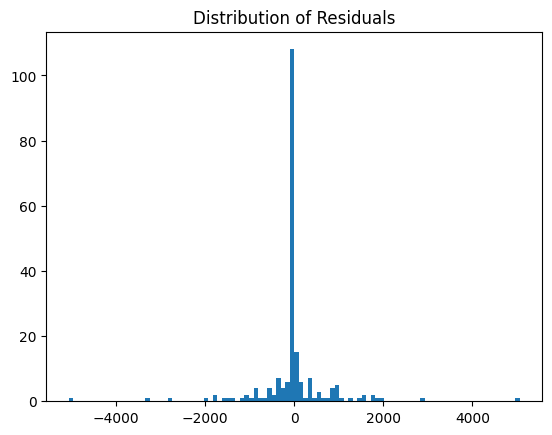

In [ ]:
plt.hist(residuals, bins=100)
plt.title("Distribution of Residuals")
plt.show()

### ⚖️ Checking for homoscedasticity

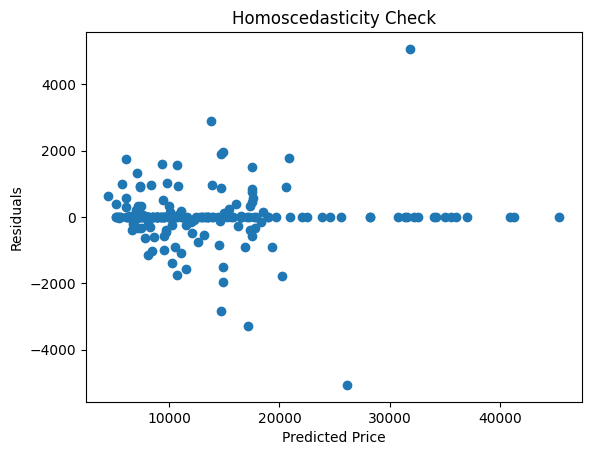

In [ ]:
plt.scatter(response_predictions, residuals)
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


### 🪜 Step 6 of 7: Running Non-Parametric Regression Models
🌳 Exploring Alternative Models

Now I will move on to non-parametric models since my linear regression showed signs of heteroscedasticity.
I’ll compare the Mean Absolute Error (MAE) of three models:

Decision Tree Regression

K-Nearest Neighbors Regression

Support Vector Regression

I’ll first split the dataset into training (80%) and testing (20%) sets.

### 🔀 Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)


### 🌳 Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)
mae_dt = mean_absolute_error(y_test, dt_predictions)
print("Decision Tree MAE:", mae_dt)


Decision Tree MAE: 2082.544707317073


### 🧭 K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, knn_predictions)
print("KNN MAE:", mae_knn)


KNN MAE: 2257.932512195122


### ⚙️ Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scaling predictors for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()
svr.fit(X_train_scaled, y_train.values.ravel())
svr_predictions = svr.predict(X_test_scaled)
mae_svr = mean_absolute_error(y_test, svr_predictions)
print("SVR MAE:", mae_svr)


SVR MAE: 5706.299767987122


### 🏁 Comparing Models

In [ ]:
print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"KNN MAE: {mae_knn:.2f}")
print(f"SVR MAE: {mae_svr:.2f}")


Decision Tree MAE: 2082.54
KNN MAE: 2257.93
SVR MAE: 5706.30


###🪜 Step 7 of 7: Summary and Business Recommendations
🧭 Reflecting on the Results

Now I will summarize the key findings and provide recommendations to Akashi’s management team based on the models I tested.
After comparing the three non-parametric models, I can identify which one offers the lowest prediction error and therefore the best performance.

📊 Model Evaluation

Decision Tree Regression: MAE ≈ 2082 USD

K-Nearest Neighbors: MAE ≈ 2258 USD

Support Vector Regression: MAE ≈ 5706 USD

Among these, the Decision Tree Regressor performed the best, achieving the lowest mean absolute error.
This means it predicts car prices with the smallest average deviation from the true market prices.


💡 Interpretation and Next Steps

Now I will interpret what these results mean for Akashi’s pricing strategy:

**Linear Regression Limitations:**
The initial linear regression model produced a very high R² (0.98), but the residuals were heteroscedastic, suggesting that the model wasn’t equally accurate for all price ranges.


**Non-Parametric Models:**
By relaxing the strict assumptions of linear regression, non-parametric methods like Decision Trees provided more robust and realistic predictions, especially for cheaper vehicles where the linear model struggled.


**Business Implication:**
Akashi can use the Decision Tree model to estimate car prices that better align with U.S. market dynamics.
This will help avoid overpricing and make their vehicles more competitive.


**Next Steps for Improvement:**

Collect additional data (e.g., brand reputation, safety ratings, regional demand).

Test Ensemble Methods such as Random Forest or Gradient Boosting for higher accuracy.

Deploy the final model through a pricing dashboard for management use.

🏁 Conclusion

**Now I have completed the end-to-end analysis:**
I loaded and explored U.S. car market data, selected relevant predictors, built and evaluated a regression model, checked its assumptions, and compared alternative models.

The final recommendation is that Akashi adopts the Decision Tree model as its baseline tool for predicting U.S. car prices, providing a data-driven foundation for the company’s re-entry strategy into the market.